In [75]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go


months = {
        1: 'Январе',
        2: 'Феврале',
        3: 'Марте',
        4: 'Апреле',
        5: 'Мае',
        6: 'Июне',
        7: 'Июле',
        8: 'Августе',
        9: 'Сентябре',
        10: 'Октябре',
        11: 'Ноябре',
        12: 'Декабре'
    }

# Шаг 1. Открытие и изучение файлов

## Тарифы

### Описание тарифов

**Тариф «Смарт»**
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

In [2]:
tariffs = pd.read_csv('tariffs.csv')
tariffs.info()
tariffs.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## Пользователи

In [3]:
users = pd.read_csv('users.csv')
users.info()
users.sample(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
324,1324,25,NaN,Череповец,Дайна,Березина,2018-05-28,smart
181,1181,37,NaN,Омск,Рем,Аврорин,2018-11-23,smart
221,1221,40,NaN,Белгород,Джемма,Сафонова,2018-06-03,smart
414,1414,70,NaN,Владимир,Александра,Лобанова,2018-05-05,smart



Статистическое описание датафрейма "Пользователи" позволяет сделать следующие выводы:      
- Средний возраст пользователей - 46 лет      
- Возрастные рамки соблюдаются: возраст пользователей от 18 до 75-ти лет - аномальные значения отсутствуют      
- Подавляющее большинство пользователей - люди в возрасте от 32 до 60-ти лет      
- Стандартное отклонение возраста показывает, что возраст пользователей довольно сильно рассеян относительно среднего. Также это показывает гистограмма распределения возраста      
- Тариф "Смарт" лидирует в количестве пользователей: их на нем 70%      



,age
count,500.00000
mean,46.58800
std,16.66763
min,18.00000
25%,32.00000
50%,46.00000
75%,62.00000
max,75.00000


<AxesSubplot:>

,churn_date,city,first_name,last_name,reg_date,tariff
count,38,500,500,500,500,500
unique,33,76,246,419,270,2
top,2018-12-03,Москва,Радим,Андреенко,2018-05-28,smart
freq,2,99,6,5,8,351


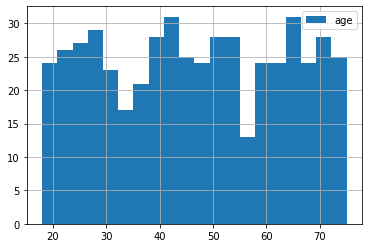

In [4]:
print(f'\nСтатистическое описание датафрейма "Пользователи" позволяет сделать следующие выводы:\
      \n- Средний возраст пользователей - 46 лет\
      \n- Возрастные рамки соблюдаются: возраст пользователей от 18 до 75-ти лет - аномальные значения отсутствуют\
      \n- Подавляющее большинство пользователей - люди в возрасте от 32 до 60-ти лет\
      \n- Стандартное отклонение возраста показывает, что возраст пользователей довольно сильно рассеян относительно среднего. Также это показывает гистограмма распределения возраста\
      \n- Тариф "Смарт" лидирует в количестве пользователей: их на нем {round(users.describe(include=["object"]).iloc[-1,-1]/users.describe(include=["object"]).iloc[0,-1]*100)}%\
      \n')
      
display(users.describe()['age'].to_frame(), users.age.hist(bins=20, legend=True), users.describe(include=['object']))

## Звонки

In [5]:
calls = pd.read_csv('calls.csv')
calls.info()
calls.sample(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
103684,1265_346,2018-08-11,12.54,1265
195329,1479_132,2018-10-20,0.00,1479
17860,1049_215,2018-09-28,4.40,1049
67207,1171_232,2018-10-09,0.00,1171



Статистическое описание датафрейма "Звонки" позволяет сделать следующие выводы:      
- Средняя длительность звонка - 6 минут 45 секунд      
- Стандартное отклонение показывает, что разброс длительности звонков очень велик, и показатель средней длительности не отражает реальное положение вещей      
Также это показывает гистограмма распределения длительноси звонков      
- Четверть звонков всего набора данных - пропущенные, о чем свидетельствует первый квартиль и инфо о топе по количеству звонков каждого значения длительности      
- Самый популярный день по количеству звонков - Новый год - 31-ое декабря 🎄      



,duration
count,202607.000000
mean,6.755887
std,5.843365
min,0.000000
25%,1.300000
50%,6.000000
75%,10.700000
max,38.000000


<AxesSubplot:>

,duration
0.00,39613
4.49,142
5.50,142
6.15,141
6.38,141


,id,call_date
count,202607,202607
unique,202607,365
top,1000_0,2018-12-31
freq,1,1435


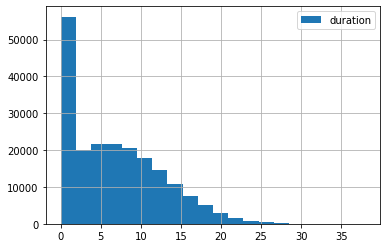

In [6]:
print(f'\nСтатистическое описание датафрейма "Звонки" позволяет сделать следующие выводы:\
      \n- Средняя длительность звонка - 6 минут 45 секунд\
      \n- Стандартное отклонение показывает, что разброс длительности звонков очень велик, и показатель средней длительности не отражает реальное положение вещей\
      \nТакже это показывает гистограмма распределения длительноси звонков\
      \n- Четверть звонков всего набора данных - пропущенные, о чем свидетельствует первый квартиль и инфо о топе по количеству звонков каждого значения длительности\
      \n- Самый популярный день по количеству звонков - Новый год - 31-ое декабря 🎄\
      \n')

display(calls.describe()['duration'].to_frame(), calls.duration.hist(bins=20, legend=True), calls.duration.value_counts().to_frame().head(5), calls.describe(include=['object']))

## Интернет

In [7]:
internet = pd.read_csv('internet.csv')
internet.info()
internet.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
143995,143995,1481_349,221.63,2018-09-24,1481
123416,123416,1415_24,619.48,2018-11-28,1415



Статистическое описание датафрейма "Интернет" позволяет сделать следующие выводы:      
- Средний объем израсходованного интернет-трафика за сессию - 370 мб      
- Стандартное отклонение показывает, что разброс длительности составляет 75% от среднего, что свидетельствует о малозначащем смысле среднего значения      
О чем также свидетельствует гистограмма распределения объама расходуемого трафика за сессию      
- Расход более 75% сессий составляет не более до 600 мб трафика      
- Полярными датами по количеству сессий являются 2018-12-31 - самое наибольшее и 2018-01-01 - самое наименьшее.      
В первом случае это связано с предновогодней суетой и постоянным времяпрепровождением в интернете в поисках подарков, и рецептов к новогоднему столу      
Во втором - с моральной усталостью после праздника и желанием побыть с семьей/прогуляться на свежем воздухе



,mb_used
count,149396.000000
mean,370.192426
std,278.300951
min,0.000000
25%,138.187500
50%,348.015000
75%,559.552500
max,1724.830000


<AxesSubplot:>

,id,session_date
count,149396,149396
unique,149396,365
top,1000_0,2018-12-31
freq,1,1057


,session_date
2018-12-31,1057
2018-01-01,3


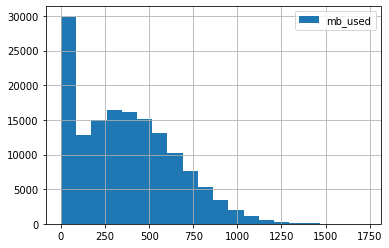

In [8]:
print(f'\nСтатистическое описание датафрейма "Интернет" позволяет сделать следующие выводы:\
      \n- Средний объем израсходованного интернет-трафика за сессию - 370 мб\
      \n- Стандартное отклонение показывает, что разброс длительности составляет 75% от среднего, что свидетельствует о малозначащем смысле среднего значения\
      \nО чем также свидетельствует гистограмма распределения объама расходуемого трафика за сессию\
      \n- Расход более 75% сессий составляет не более до 600 мб трафика\
      \n- Полярными датами по количеству сессий являются 2018-12-31 - самое наибольшее и 2018-01-01 - самое наименьшее.\
      \nВ первом случае это связано с предновогодней суетой и постоянным времяпрепровождением в интернете в поисках подарков, и рецептов к новогоднему столу\
      \nВо втором - с моральной усталостью после праздника и желанием побыть с семьей/прогуляться на свежем воздухе\n')
      
display(internet.describe()['mb_used'].to_frame(), internet.mb_used.hist(bins=20, legend=True), internet.describe(include=['object']), internet.session_date.value_counts().to_frame().iloc[[0,-1], :])

## Сообщения

In [9]:
messages = pd.read_csv('messages.csv')
messages.info()
messages.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
72969,1309_105,2018-12-03,1309
42558,1183_201,2018-07-19,1183


In [10]:
print(f'\nСтатистическое описание датафрейма "Сообщения" позволяет сделать следующие выводы:\
      \n- Сообщения посылаются почти каждый день\
      \n- Больше всего в 31 декабря - 859 раз - поздравления с Новым годом\
      \n')
      
display(messages.describe(include=['object']), 
        messages.message_date.value_counts().to_frame().iloc[[0,-1], :])


Статистическое описание датафрейма "Сообщения" позволяет сделать следующие выводы:      
- Сообщения посылаются почти каждый день      
- Больше всего в 31 декабря - 859 раз - поздравления с Новым годом      



,id,message_date
count,123036,123036
unique,123036,364
top,1000_0,2018-12-31
freq,1,859


,message_date
2018-12-31,859
2018-01-03,4


# Шаг 2. Подготовка данных

## Приведение данных к нужным типам

In [11]:
# в каждом датафрейме есть дата использования интернета, смс и звонка
# необходимо привести тип к datetime

calls['call_date'] = pd.to_datetime(calls['call_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])

In [12]:
# округляем секунды в звонках, по условию тарифа

calls['duration'] = calls['duration'].apply(np.ceil)
calls.sample(4)

,id,call_date,duration,user_id
65035,1168_186,2018-03-25,0.0,1168
166479,1410_114,2018-10-21,22.0,1410
79297,1197_289,2018-06-26,7.0,1197
120998,1312_328,2018-12-02,15.0,1312


In [21]:
# проставляем месяц

calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

# проверка
display(calls.sample(2))
display(messages.sample(2))
display(internet.sample(2))

,id,call_date,duration,user_id,month
7604,1021_72,2018-12-27,6.0,1021,12
133514,1341_744,2018-08-18,12.0,1341,8


,id,message_date,user_id,month
58846,1257_638,2018-11-02,1257,11
23002,1096_282,2018-08-15,1096,8


,Unnamed: 0,id,mb_used,session_date,user_id,month
143117,143117,1479_192,244.91,2018-09-03,1479,9
109796,109796,1374_7,307.88,2018-09-23,1374,9


## Рассчет по каждому пользователю

### Количество сделанных звонков и израсходованных минут

In [37]:
user_calls = (calls.groupby(['user_id', 'month'])
                  .agg({'duration':'sum', 'id':'count'})
                  .reset_index()
                  .rename(columns={'duration':'call_dration_month','id':'number_calls_month'}))

user_calls.head()

,user_id,month,call_dration_month,number_calls_month
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58


### Количество отправленных сообщений по месяцам

In [36]:
user_messages = (messages.groupby(['user_id', 'month'])
                        .agg({'id':'count'})
                        .reset_index()
                        .rename(columns={'id':'number_sms_month'}))

user_messages.head()

,user_id,month,number_sms_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Объем израсходованного интернет-трафика по месяцам

In [35]:
user_internet = (internet.groupby(['user_id', 'month'])
                        .agg({'mb_used':'sum'})
                        .reset_index()
                        .rename(columns={'mb_used':'mb_dration_month'}))

user_internet.head()

,user_id,month,mb_dration_month
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


### Помесячная выручка с каждого пользователя

In [ ]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

In [59]:
# объеденим все датафреймы в однин

df = user_calls.merge(user_messages, on=['user_id','month'], how='outer')
df = df.merge(user_internet, on=['user_id','month'], how = 'outer')
df = df.merge(users, on='user_id', how='left')
df = df.merge(tariffs, on='tariff', how='left')

df.head()

,user_id,month,call_dration_month,number_calls_month,number_sms_month,mb_dration_month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,43.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,47.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,52.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,58.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [54]:
# возможно, кто то не использовал смс, минуты или интернет
df.isna().sum()


user_id                     0
month                       0
call_dration_month         40
number_calls_month         40
number_sms_month          497
mb_dration_month           11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [58]:
# заменим пропуски у пользователей, которые не использовали смс, звонки или интернет

df['call_dration_month'] = df['call_dration_month'].fillna(0)
df['number_calls_month'] = df['number_calls_month'].fillna(0)
df['number_sms_month'] = df['number_sms_month'].fillna(0)
df['mb_dration_month'] = df['mb_dration_month'].fillna(0)

df.isna().sum()

user_id                     0
month                       0
call_dration_month          0
number_calls_month          0
number_sms_month            0
mb_dration_month            0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [71]:
# функции для рассчета затраченных смс, минут и интернета сверх тарифа

def over_counter_calls(row):
    if row['tariff'] == 'ultra':
        res = row['call_dration_month'] - 3000
        return np.where(res > 0, res, 0)
    else:
        result = row['call_dration_month'] - 500
        return np.where(result > 0, result, 0)

def over_counter_sms(row):
    if row['tariff'] == 'ultra':
        result =  row['number_sms_month'] - 1000
        return np.where(result > 0, result, 0)
    else:
        result = row['number_sms_month'] - 50
        return np.where(result > 0, result, 0)
    

def over_counter_internet(row):
    if row['tariff'] == 'ultra':
        result = row['mb_dration_month'] - 30 * 1024
        return np.where(result > 0, result, 0)
    else:
        result = row['mb_dration_month'] - 15 * 1024
        return np.where(result > 0, result, 0)

def month_revenue(row):
    sum_per_month = 0
    if row['tariff'] == 'ultra':
        sum_per_month += np.ceil(row['call_over']) * 1
        sum_per_month += row['sms_over'] * 1
        sum_per_month += np.ceil(row['mb_over']/1024) * 150
        return sum_per_month
    
    else:
        sum_per_month += np.ceil(row['call_over']) * 3
        sum_per_month += row['sms_over'] * 3
        sum_per_month += np.ceil(row['mb_over']/1024) * 200
        return sum_per_month

In [72]:
# применяем функцию к соответствующему столбцу
df['call_over'] = df.apply(over_counter_calls, axis=1)
df['sms_over'] = df.apply(over_counter_sms, axis=1)
df['mb_over'] = df.apply(over_counter_internet, axis=1)
df['payment_over'] = df.apply(month_revenue, axis=1)

# меняем типы
df['call_over'] = df['call_over'].astype('float')
df['mb_over'] = df['mb_over'].astype('float')
df['sms_over'] = df['sms_over'].astype('int')
df['payment_over'] = df['payment_over'].astype('int')

df.head()

,user_id,month,call_dration_month,number_calls_month,number_sms_month,mb_dration_month,age,churn_date,city,first_name,...,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_over,sms_over,mb_over,payment_over
0,1000,5,159.0,22.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0,0.0,0
1,1000,6,172.0,43.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0,0.0,0
2,1000,7,340.0,47.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0,0.0,0
3,1000,8,408.0,52.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0,0.0,0
4,1000,9,466.0,58.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,...,30720,3000,1950,150,1,1,0.0,0,0.0,0


In [74]:
# прибавляем оплату за тариф и оплату за использование услуг сверх тарифа
df['total amount'] = df['rub_monthly_fee'] + df['payment_over']

df.head()

,user_id,month,call_dration_month,number_calls_month,number_sms_month,mb_dration_month,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_over,sms_over,mb_over,payment_over,total amount
0,1000,5,159.0,22.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,0.0,0,0.0,0,1950
1,1000,6,172.0,43.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,0.0,0,0.0,0,1950
2,1000,7,340.0,47.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,0.0,0,0.0,0,1950
3,1000,8,408.0,52.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,0.0,0,0.0,0,1950
4,1000,9,466.0,58.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,0.0,0,0.0,0,1950
